<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/13_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다항회귀(Polynomial Regression) 기반 예측

/tmp/ipython-input-2059404930.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2010-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


📌 Training Mean Squared Error (MSE): 753.3942
📌 Training R-squared (R²): 0.8801
📌 Test Mean Squared Error (MSE): 183896.8055
📌 Test R-squared (R²): -51.5755


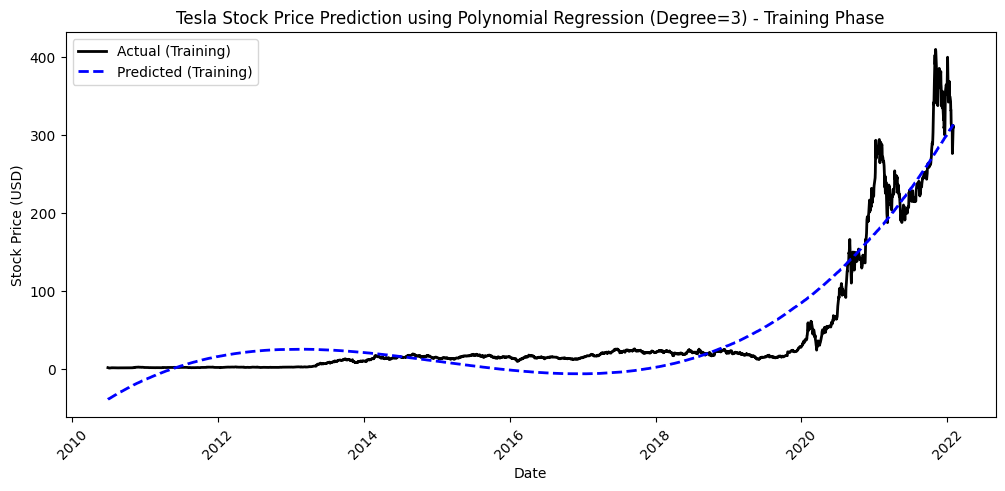

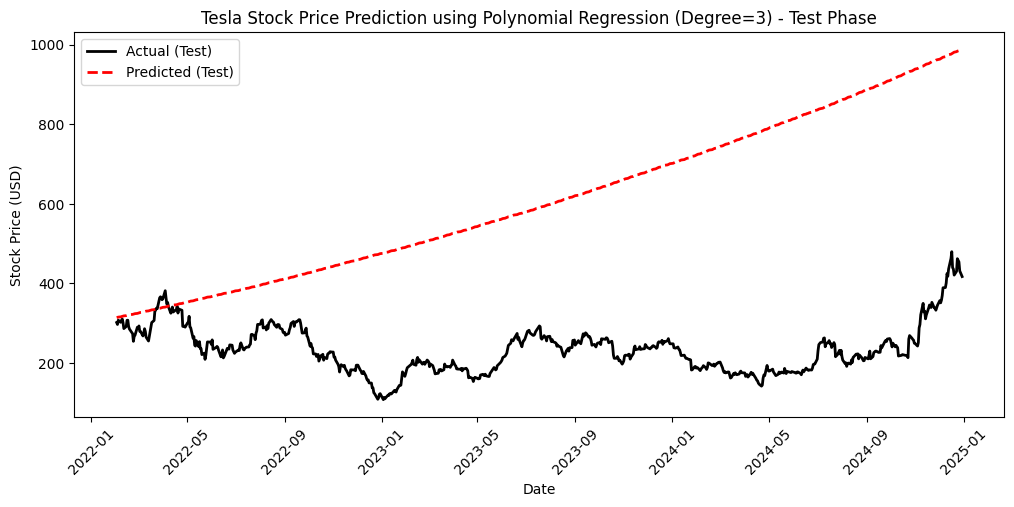

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2010-01-01", end="2024-12-31")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ Feature 생성: 날짜를 숫자로 변환
df["Day"] = np.arange(len(df))

# 📌 3️⃣ 학습(train) / 테스트(test) 데이터 분할 (80:20)
X = df[["Day"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 📌 4️⃣ 다항 회귀 모델 (Polynomial Regression) 적용
degree = 3  # 다항식 차수 (3차 다항 회귀 사용)
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 📌 5️⃣ 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 📌 6️⃣ 예측 수행
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# 📌 7️⃣ 성능 평가
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"📌 Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"📌 Training R-squared (R²): {train_r2:.4f}")

print(f"📌 Test Mean Squared Error (MSE): {test_mse:.4f}")
print(f"📌 Test R-squared (R²): {test_r2:.4f}")

# 📌 8️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값, Line Plot 적용)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[:len(X_train)], y_train, label="Actual (Training)", color="black", linewidth=2)
plt.plot(df["Date"].iloc[:len(X_train)], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--", linewidth=2)
plt.title(f"Tesla Stock Price Prediction using Polynomial Regression (Degree={degree}) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 9️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값, Line Plot 적용)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[len(X_train):], y_test, label="Actual (Test)", color="black", linewidth=2)
plt.plot(df["Date"].iloc[len(X_train):], y_test_pred, label="Predicted (Test)", color="red", linestyle="--", linewidth=2)
plt.title(f"Tesla Stock Price Prediction using Polynomial Regression (Degree={degree}) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# 최적 차수를 자동으로 선택하는 다항 회귀 (Polynomial Regression)

/tmp/ipython-input-1867671934.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


📌 최적 차수 (Best Degree): 2
📌 최적 MSE (Test Data): 4837.5158


📌 최적 다항 회귀식 (텍스트 표현): y = 318.90 - 0.53x + 0.00x^2
📌 최적 다항 회귀식 (수학식 표현):


Eq(y, 0.000605054142995276*x**2 - 0.53439717579227*x + 318.903852750295)

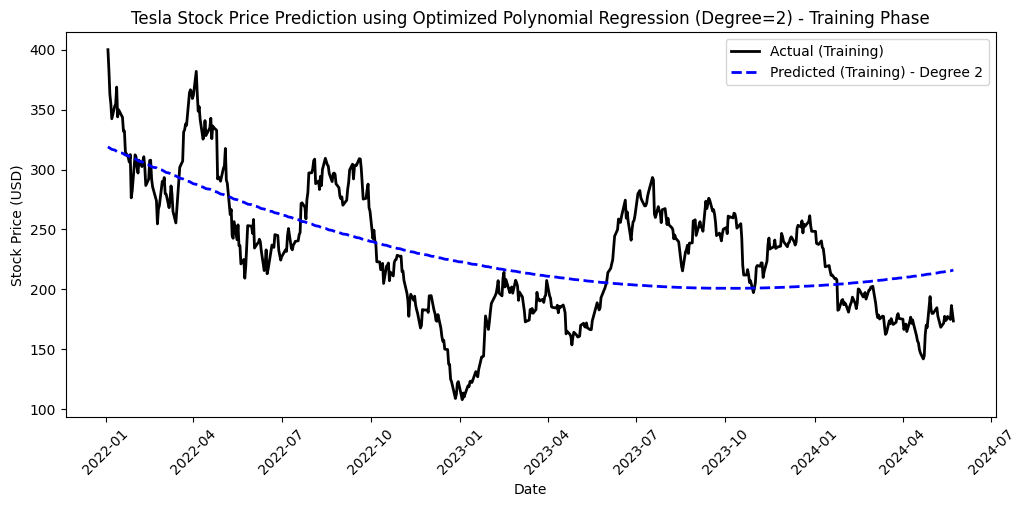

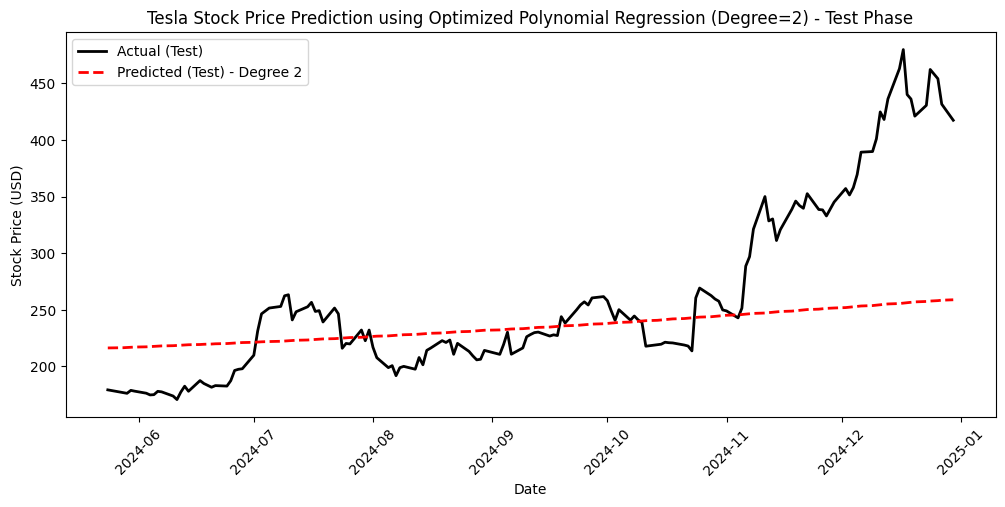

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sympy import symbols, Eq
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-12-31")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ Feature 생성: 날짜를 숫자로 변환
df["Day"] = np.arange(len(df))

# 📌 3️⃣ 학습(train) / 테스트(test) 데이터 분할 (80:20)
X = df[["Day"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 📌 4️⃣ 최적 차수(degree) 찾기
best_degree = 1
best_mse = float("inf")
best_model = None

degrees = range(1, 10)  # 다항식 차수 범위 (1~9)
train_errors = []
test_errors = []

for degree in degrees:
    # 다항 특성 변환
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # 모델 학습
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # 예측 수행
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # 성능 평가
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # 최적 차수 갱신
    if test_mse < best_mse:
        best_mse = test_mse
        best_degree = degree
        best_model = model
        best_poly = poly

print(f"📌 최적 차수 (Best Degree): {best_degree}")
print(f"📌 최적 MSE (Test Data): {best_mse:.4f}")

# 📌 5️⃣ 최적 차수를 사용한 예측
X_train_poly = best_poly.fit_transform(X_train)
X_test_poly = best_poly.transform(X_test)

# 모델 학습
best_model.fit(X_train_poly, y_train)

# 예측 수행
y_train_pred = best_model.predict(X_train_poly)
y_test_pred = best_model.predict(X_test_poly)

# 📌 6️⃣ 최적 차수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Train MSE", marker="o", linestyle="-")
plt.plot(degrees, test_errors, label="Test MSE", marker="s", linestyle="--", color="red")
plt.axvline(best_degree, color="gray", linestyle="--", label=f"Best Degree: {best_degree}")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Polynomial Degree Optimization (TSLA Stock Prediction)")
plt.legend()
plt.show()



# 📌 6️⃣ 다항 회귀 수식 (일반 텍스트 형식, 낮은 차수부터 정렬)
def get_polynomial_equation(model):
    coefs = model.coef_.flatten()
    intercept = model.intercept_

    # intercept_가 numpy.ndarray일 경우 첫 번째 요소만 사용
    if isinstance(intercept, np.ndarray):
        intercept = intercept[0]

    terms = [f"{intercept:.2f}"]  # 절편 먼저 추가

    # 계수가 0이 아닌 경우만 포함, 낮은 차수부터 출력
    has_x_term = False
    for i in range(1, len(coefs)):
        if coefs[i] != 0:  # 0이 아닌 계수만 포함
            sign = "+" if coefs[i] >= 0 else "-"
            exponent = f"x^{i}" if i > 1 else "x"
            terms.append(f"{sign} {abs(coefs[i]):.2f}{exponent}")
            has_x_term = True

    # 모든 계수가 0이면 x를 강제로 포함
    if not has_x_term:
        terms.append("+ 0.00x")

    return "y = " + " ".join(terms)

# 📌 6️⃣ 다항 회귀 수식 (Latex 형식, 낮은 차수부터 정렬)
def get_polynomial_equation_latex(model):
    coefs = model.coef_.flatten()
    intercept = model.intercept_

    # intercept_가 numpy.ndarray일 경우 첫 번째 요소만 사용
    if isinstance(intercept, np.ndarray):
        intercept = intercept[0]

    x = symbols('x')

    # 계수가 0이 아닌 경우만 포함하여 방정식 생성 (낮은 차수부터)
    equation_rhs = intercept + sum(coefs[i] * x**i for i in range(1, len(coefs)) if coefs[i] != 0)

    # 모든 계수가 0이면 x를 강제로 포함
    if equation_rhs == intercept:
        equation_rhs += 0 * x

    equation = Eq(symbols('y'), equation_rhs)

    return equation

# 📌 최적 다항 회귀식 출력
equation_text = get_polynomial_equation(best_model)
print(f"📌 최적 다항 회귀식 (텍스트 표현): {equation_text}")

equation_latex = get_polynomial_equation_latex(best_model)
print("📌 최적 다항 회귀식 (수학식 표현):")
display(equation_latex)  # Jupyter Notebook에서 실행 시 Latex 수식으로 출력됨


# 📌 7️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값, Line Plot 적용)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[:len(X_train)], y_train, label="Actual (Training)", color="black", linewidth=2)
plt.plot(df["Date"].iloc[:len(X_train)], y_train_pred, label=f"Predicted (Training) - Degree {best_degree}", color="blue", linestyle="--", linewidth=2)
plt.title(f"Tesla Stock Price Prediction using Optimized Polynomial Regression (Degree={best_degree}) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 8️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값, Line Plot 적용)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[len(X_train):], y_test, label="Actual (Test)", color="black", linewidth=2)
plt.plot(df["Date"].iloc[len(X_train):], y_test_pred, label=f"Predicted (Test) - Degree {best_degree}", color="red", linestyle="--", linewidth=2)
plt.title(f"Tesla Stock Price Prediction using Optimized Polynomial Regression (Degree={best_degree}) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


[INFO] design mode = X_df, samples=752, test_size=60, rolling_window=120, poly_degree=2


MAE      RMSE  MAPE(%)      R2
Full-Series (IS all)   39.7273   47.4439  17.9155  0.3926
Full-Series (IS test)  66.0504   79.1447  19.2162  0.0075
Fixed-Origin           88.6009  112.3574  23.7364 -1.0003
Rolling                29.5042   36.0708   9.0230  0.7938
Expanding              74.1545   91.7330  20.1445 -0.3333

y_true  full_series(IS)  fixed_origin     rolling   expanding
Date                                                                         
2024-10-04  250.080002       270.897977    231.299643  238.486005  231.299643
2024-10-07  240.830002       271.416428    231.567973  239.376149  231.811874
2024-10-08  244.500000       271.936640    231.837438  239.653303  232.199695
2024-10-09  241.050003       272.458615    232.108039  240.248197  232.631662
2024-10-10  238.770004       272.982352    232.379774  240.726594  233.015258

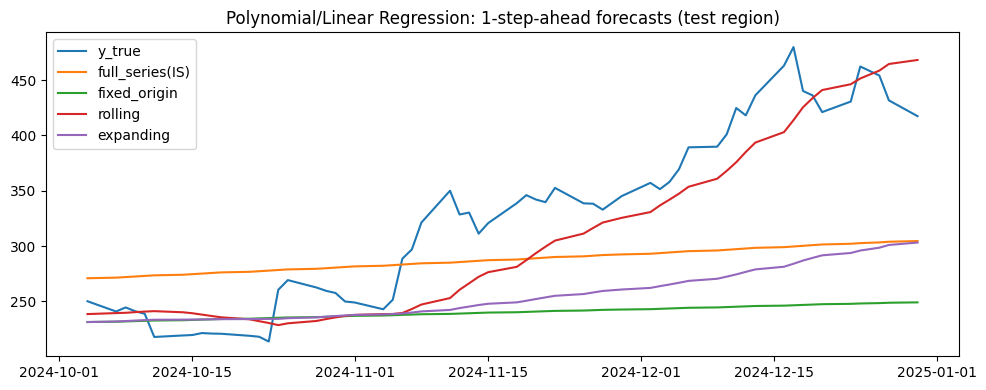

[INFO] saved: forecast_preds_polylinear.csv, forecast_metrics_polylinear.csv


In [3]:
# ===============================================================
# (폴리노미얼 포함) Linear/Polynomial Regression 시계열 예측 - 4 스킴 올인원 셀
#   1) Full-series (내표본)
#   2) Fixed-origin (정적 파라미터, 1-스텝 OOS)
#   3) Rolling window (리핏, 1-스텝 OOS)
#   4) Expanding window (리핏, 1-스텝 OOS)
#
# 특징:
#  - df / X / y 자동 감지 (없으면 df에서 y, X, Date 자동 선택)
#  - X가 없으면 단일예측자 fallback: lag1(AR1) → 실패 시 trend(t)
#  - POLY_DEGREE 로 선형(=1) 또는 다항 회귀(2, 3, …) 선택
#  - sklearn 구버전 호환(RMSE)
#  - 플롯 x축을 날짜로 표시(DATE_COL 또는 DatetimeIndex 사용)
# 출력:
#  - preds(DataFrame), metrics(DataFrame), 날짜 x축 플롯, CSV 저장
# ===============================================================
from typing import Optional, Tuple, Dict, List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# --------------------------
# ★ 필요 시 여기만 수정 ★
# --------------------------
TEST_SIZE       = 60             # 테스트(평가) 구간 길이
ROLLING_WINDOW  = None           # None이면 자동(min(120, 학습길이)). 예: 120
FIT_INTERCEPT   = True
POLY_DEGREE     = 2              # 1이면 일반 선형회귀, 2 이상이면 다항회귀(Polynomial Regression)

# df에서 명시적으로 타깃/설명/날짜 컬럼 지정 (미지정 시 자동 감지)
Y_COL:    Optional[str]    = None       # 예: "Close"
X_COLS:   Optional[List[str]] = None    # 예: ["Day"] 또는 ["x1","x2"]; None이면 자동 감지(우선 Day/ x / 첫 숫자컬럼)
DATE_COL: Optional[str]    = "Date"     # df에 날짜 컬럼이 있으면 지정; DatetimeIndex면 자동 사용

# ------------------------------------------------------------
# 도우미: 지표, 모델, 설계행렬 구성, 자동 감지
# ------------------------------------------------------------
def _safe_rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """sklearn 버전에 따라 squared=False 미지원 시에도 동작하도록 RMSE 계산"""
    try:
        return mean_squared_error(y_true, y_pred, squared=False)  # 신버전
    except TypeError:
        return float(np.sqrt(mean_squared_error(y_true, y_pred))) # 구버전

def _metrics(y_true: np.ndarray, y_pred: np.ndarray) -> Dict[str, float]:
    eps = 1e-12
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": _safe_rmse(y_true, y_pred),
        "MAPE(%)": float(np.mean(np.abs((y_true - y_pred) / np.where(np.abs(y_true)<eps, eps, y_true))) * 100.0),
        "R2": r2_score(y_true, y_pred),
    }

def _ensure_2d(X) -> pd.DataFrame:
    """Series/ndarray -> 2D DataFrame 보장"""
    if isinstance(X, pd.DataFrame):
        return X
    if isinstance(X, pd.Series):
        return X.to_frame(name=getattr(X, "name", "x"))
    X = np.asarray(X)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    return pd.DataFrame(X, columns=[f"x{i}" for i in range(X.shape[1])])

def _as_series(obj, name="y") -> pd.Series:
    """ndarray도 Series로, index는 보존되면 재사용"""
    if isinstance(obj, pd.Series):
        return pd.to_numeric(obj, errors="coerce")
    if isinstance(obj, pd.DataFrame):
        if obj.shape[1] == 1:
            return pd.to_numeric(obj.iloc[:,0], errors="coerce").rename(name)
        raise ValueError("y로 DataFrame을 전달하려면 단일 컬럼이어야 합니다.")
    arr = np.asarray(obj).reshape(-1)
    return pd.Series(arr, name=name)

def _auto_pick_from_df(df: pd.DataFrame,
                       y_col: Optional[str],
                       x_cols: Optional[List[str]],
                       date_col: Optional[str]):
    """df에서 y / X(여러 컬럼 가능) / 날짜 자동 선택"""
    # 날짜 인덱스 후보
    idx = df.index
    date_idx = None
    if date_col and date_col in df.columns:
        try:
            date_idx = pd.to_datetime(df[date_col], errors="coerce")
        except Exception:
            date_idx = None
    if isinstance(idx, pd.DatetimeIndex):
        date_idx = idx

    # y 후보
    y_series = None
    if y_col and y_col in df.columns:
        y_series = pd.to_numeric(df[y_col], errors="coerce").rename("y")
    else:
        for c in ["y","Y","target","Target","Close","close","value","Value"]:
            if c in df.columns:
                y_series = pd.to_numeric(df[c], errors="coerce").rename("y")
                break
        if y_series is None:
            num_cols = [c for c in df.select_dtypes(include=[np.number]).columns]
            if num_cols:
                y_series = pd.to_numeric(df[num_cols[0]], errors="coerce").rename("y")
            else:
                raise ValueError("df에서 y로 사용할 숫자형 컬럼을 찾지 못했습니다. Y_COL을 지정하세요.")

    # X 후보(여러 컬럼 가능)
    X_df = None
    if x_cols:
        cols = [c for c in x_cols if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]
        if cols:
            X_df = df[cols].apply(pd.to_numeric, errors="coerce")
    else:
        # 우선 Day / x / (y가 아닌 첫 숫자컬럼) 순서로 선택
        pref = []
        if "Day" in df.columns and pd.api.types.is_numeric_dtype(df["Day"]):
            pref = ["Day"]
        elif "x" in df.columns and pd.api.types.is_numeric_dtype(df["x"]):
            pref = ["x"]
        else:
            cand = [c for c in df.select_dtypes(include=[np.number]).columns if c != y_series.name]
            if cand:
                pref = [cand[0]]
        if pref:
            X_df = df[pref].apply(pd.to_numeric, errors="coerce")

    # 날짜 인덱스 적용
    if date_idx is not None:
        y_series.index = date_idx
        if X_df is not None:
            X_df.index = date_idx

    return y_series, X_df, date_idx

def _build_design_simple(y: pd.Series,
                         X_df: Optional[pd.DataFrame],
                         fallback: str = "lag1_then_trend"):
    """
    설계행렬 구성:
      - X_df가 있으면 그것으로 진행 (다항은 이후 PolynomialFeatures에서 처리)
      - X_df가 없으면 fallback: lag1 → trend(t)
    반환: (X, y, used_mode)  used_mode in {"X_df","lag1","trend"}
    """
    y = pd.to_numeric(pd.Series(y).dropna(), errors="coerce")
    used = None
    if X_df is not None:
        X_df = X_df.reindex(y.index)
        valid = ~(X_df.isna().any(axis=1) | y.isna())
        used = "X_df"
        return X_df.loc[valid], y.loc[valid], used

    if fallback == "lag1_then_trend":
        lag1 = y.shift(1).rename("lag1")
        X = lag1.to_frame()
        valid = ~(X.isna().any(axis=1) | y.isna())
        if valid.sum() >= 10:
            used = "lag1"
            return X.loc[valid], y.loc[valid], used
        t = pd.Series(np.arange(len(y), dtype=float), index=y.index, name="t")
        X = t.to_frame()
        valid = ~(X.isna().any(axis=1) | y.isna())
        used = "trend"
        return X.loc[valid], y.loc[valid], used

    # 강제 추세
    t = pd.Series(np.arange(len(y), dtype=float), index=y.index, name="t")
    X = t.to_frame()
    valid = ~(X.isna().any(axis=1) | y.isna())
    used = "trend"
    return X.loc[valid], y.loc[valid], used

def _make_model(poly_degree: int, fit_intercept: bool) -> Pipeline:
    """PolynomialFeatures(+LinearRegression) 파이프라인 생성 (degree=1은 선형회귀와 동일)"""
    if poly_degree is None or poly_degree < 1:
        poly_degree = 1
    if poly_degree == 1:
        # 굳이 PolynomialFeatures를 쓰지 않고 Linear만
        return Pipeline([("lr", LinearRegression(fit_intercept=fit_intercept))])
    else:
        return Pipeline([
            ("poly", PolynomialFeatures(degree=poly_degree, include_bias=False)),
            ("lr", LinearRegression(fit_intercept=fit_intercept)),
        ])

# ------------------------------------------------------------
# 고정원점/롤링/확장 예측기
# ------------------------------------------------------------
def _full_series_is(X: pd.DataFrame, y: pd.Series, poly_degree=1, fit_intercept=True) -> np.ndarray:
    m = _make_model(poly_degree, fit_intercept)
    m.fit(X, y)
    return m.predict(X)

def _fixed_origin(X: pd.DataFrame, y: pd.Series, test_size: int, poly_degree=1, fit_intercept=True):
    n = len(y); split = n - test_size
    X_tr, y_tr = X.iloc[:split, :], y.iloc[:split]
    X_te, y_te = X.iloc[split:, :], y.iloc[split:]
    m = _make_model(poly_degree, fit_intercept)
    m.fit(X_tr, y_tr)
    yhat = m.predict(X_te)
    return y_te.index, y_te.to_numpy(), yhat

def _rolling_window(X: pd.DataFrame, y: pd.Series, test_size: int, window: int, poly_degree=1, fit_intercept=True):
    n = len(y); test_start = n - test_size
    idxs, ytrue, yhat = [], [], []
    for t in range(test_start, n):
        tr_start = max(0, t - window)
        X_tr, y_tr = X.iloc[tr_start:t, :], y.iloc[tr_start:t]
        X_te = X.iloc[t:t+1, :]
        m = _make_model(poly_degree, fit_intercept)
        m.fit(X_tr, y_tr)
        yhat.append(m.predict(X_te)[0])
        ytrue.append(y.iloc[t])
        idxs.append(y.index[t])
    return pd.Index(idxs), np.array(ytrue), np.array(yhat)

def _expanding_window(X: pd.DataFrame, y: pd.Series, test_size: int, poly_degree=1, fit_intercept=True):
    n = len(y); test_start = n - test_size
    idxs, ytrue, yhat = [], [], []
    for t in range(test_start, n):
        X_tr, y_tr = X.iloc[:t, :], y.iloc[:t]
        X_te = X.iloc[t:t+1, :]
        m = _make_model(poly_degree, fit_intercept)
        m.fit(X_tr, y_tr)
        yhat.append(m.predict(X_te)[0])
        ytrue.append(y.iloc[t])
        idxs.append(y.index[t])
    return pd.Index(idxs), np.array(ytrue), np.array(yhat)

# ------------------------------------------------------------
# 0) 데이터 자동 감지 (df, X, y → 우선 사용)
# ------------------------------------------------------------
y_series: Optional[pd.Series]   = None
X_design_raw: Optional[pd.DataFrame] = None
date_index: Optional[pd.DatetimeIndex] = None

_glob = globals()

# 0-1) 이미 만든 y/X 우선 사용
if "y" in _glob:
    try:
        y_series = _as_series(_glob["y"], name="y")
    except Exception:
        y_series = None

if "X" in _glob and y_series is not None:
    try:
        X_design_raw = _ensure_2d(_glob["X"]).reindex(y_series.index)
    except Exception:
        X_design_raw = None

# 0-2) df 기반 자동 탐지
if y_series is None or X_design_raw is None:
    if "df" in _glob:
        _df = _glob["df"].copy()
        y2, X2, dt_idx = _auto_pick_from_df(_df, Y_COL, X_COLS, DATE_COL)
        if y_series is None:
            y_series = y2
        if X_design_raw is None and X2 is not None:
            X_design_raw = X2
        if date_index is None:
            date_index = dt_idx

# 0-3) 날짜 인덱스 보강 (df.Date가 있는데 위에서 못 썼다면)
if date_index is None and "df" in _glob and DATE_COL and DATE_COL in _glob["df"].columns:
    try:
        date_index = pd.to_datetime(_glob["df"][DATE_COL], errors="coerce")
    except Exception:
        date_index = None

if date_index is not None:
    if y_series is not None:
        y_series.index = date_index[:len(y_series)]
    if X_design_raw is not None:
        X_design_raw.index = date_index[:len(X_design_raw)]

# 0-4) 여전히 y가 없으면 에러
if y_series is None:
    raise RuntimeError("타깃 y를 찾지 못했습니다. df/Y_COL 또는 y 변수를 준비해 주세요.")

# ------------------------------------------------------------
# 1) 설계행렬 구성 (X 없으면 lag1 → trend), 이후 폴리노미얼은 모델 단계에서 처리
# ------------------------------------------------------------
X_base, y_clean, used_mode = _build_design_simple(y_series, X_design_raw, fallback="lag1_then_trend")

n = len(y_clean)
assert 1 <= TEST_SIZE < n, f"TEST_SIZE(={TEST_SIZE})는 1~{n-1} 사이여야 합니다."
test_start = n - TEST_SIZE
test_index = y_clean.index[test_start:]

# ------------------------------------------------------------
# 2) 4 스킴 실행 (POLY_DEGREE 적용)
# ------------------------------------------------------------
# Full-series (IS 전체/IS 테스트절단)
yhat_is_all  = _full_series_is(X_base, y_clean, poly_degree=POLY_DEGREE, fit_intercept=FIT_INTERCEPT)
yhat_is_test = yhat_is_all[test_start:]

# Fixed-origin
idx_fo, y_true_fo, yhat_fo = _fixed_origin(X_base, y_clean, test_size=TEST_SIZE,
                                           poly_degree=POLY_DEGREE, fit_intercept=FIT_INTERCEPT)

# Rolling
if ROLLING_WINDOW is None:
    ROLLING_WINDOW = min(120, n - TEST_SIZE)
idx_rw, y_true_rw, yhat_rw = _rolling_window(X_base, y_clean, test_size=TEST_SIZE, window=ROLLING_WINDOW,
                                             poly_degree=POLY_DEGREE, fit_intercept=FIT_INTERCEPT)

# Expanding
idx_ex, y_true_ex, yhat_ex = _expanding_window(X_base, y_clean, test_size=TEST_SIZE,
                                               poly_degree=POLY_DEGREE, fit_intercept=FIT_INTERCEPT)

# ------------------------------------------------------------
# 3) 결과 취합 & 지표
# ------------------------------------------------------------
preds = pd.DataFrame(index=test_index)
preds["y_true"]            = y_clean.iloc[test_start:].to_numpy()
preds["full_series(IS)"]   = yhat_is_test
preds["fixed_origin"]      = pd.Series(yhat_fo, index=idx_fo)
preds["rolling"]           = pd.Series(yhat_rw, index=idx_rw)
preds["expanding"]         = pd.Series(yhat_ex, index=idx_ex)

metrics = pd.DataFrame({
    "Full-Series (IS all)" : _metrics(y_clean.to_numpy(), yhat_is_all),
    "Full-Series (IS test)": _metrics(preds["y_true"].to_numpy(), preds["full_series(IS)"].to_numpy()),
    "Fixed-Origin"         : _metrics(preds["y_true"].to_numpy(), preds["fixed_origin"].to_numpy()),
    "Rolling"              : _metrics(preds["y_true"].to_numpy(), preds["rolling"].to_numpy()),
    "Expanding"            : _metrics(preds["y_true"].to_numpy(), preds["expanding"].to_numpy()),
}).T

# ------------------------------------------------------------
# 4) 표시 및(선택) 저장
# ------------------------------------------------------------
print(f"[INFO] design mode = {used_mode}, samples={n}, test_size={TEST_SIZE}, rolling_window={ROLLING_WINDOW}, poly_degree={POLY_DEGREE}")
display(metrics.round(4))
display(preds.head())

# ----- x축 날짜 보장 플롯 -----
x_idx = preds.index
try:
    x_idx = pd.to_datetime(x_idx)
except Exception:
    if "df" in globals() and DATE_COL and DATE_COL in df.columns:
        x_idx = pd.to_datetime(df[DATE_COL].iloc[-len(preds):].values, errors="coerce")

plt.figure(figsize=(10,4))
plt.plot(x_idx, preds["y_true"], label="y_true")
plt.plot(x_idx, preds["full_series(IS)"], label="full_series(IS)")
plt.plot(x_idx, preds["fixed_origin"], label="fixed_origin")
plt.plot(x_idx, preds["rolling"], label="rolling")
plt.plot(x_idx, preds["expanding"], label="expanding")
plt.title("Polynomial/Linear Regression: 1-step-ahead forecasts (test region)")
plt.legend()
plt.tight_layout()
plt.show()

# 파일로 저장(원하면 경로 바꾸세요)
#preds.to_csv("forecast_preds_polylinear.csv", index=True)
#metrics.to_csv("forecast_metrics_polylinear.csv", index=True)
#print("[INFO] saved: forecast_preds_polylinear.csv, forecast_metrics_polylinear.csv")
